In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import natsort as ns

In [2]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100

In [3]:
db = sqlite3.connect('../data/hop_teaming.sqlite')

In [11]:
tables = db.execute("SELECT name FROM sqlite_master WHERE type='table';")
for table in tables:
    print(table[0])

cbsa
specialty
referrals
nashville_referrals
nppes
communities_pats
communities
nash_vegas


In [6]:
col = db.execute("PRAGMA table_info(communities)").fetchall()
print([e[1] for e in col])

['npi', 'communityId']


In [8]:
#col = db.execute("PRAGMA table_info(specialty)").fetchall()
#print([e[1] for e in col])

In [7]:
vandy_npi_nums = [1306889597, 1396882205, 1558408633]

In [13]:
#Selects only the 3 Vanderbilt acute care centers

query = '''
SELECT *
FROM nash_vegas
'''

qtemp = pd.read_sql(query, db)

In [15]:
query1 = '''
SELECT nv.to_npi, 
    cp.communityId, 
    nv.from_npi_specialty, 
    nppes.provider_organization_name, 
    nppes.provider_first_name, 
    nppes.provider_last_name  
FROM nash_vegas AS nv
LEFT JOIN communities_pats AS cp
ON nv.from_npi = cp.npi
LEFT JOIN nppes
ON nv.from_npi = nppes.npi
WHERE nv.to_npi = 1306889597 OR nv.to_npi = 1396882205 OR nv.to_npi = 1558408633;
'''

vandy_npi = pd.read_sql(query1, db)

In [21]:
vandy_npi.sort_values('communityId')

,to_npi,communityId,from_npi_specialty,provider_organization_name,provider_first_name,provider_last_name
683,1396882205,7,Urology,None,DOUGLAS,ALTENBERN
2151,1396882205,7,Urology,None,WHITSON,LOWE
916,1396882205,7,Family Medicine,None,HAL,JENKINS
910,1396882205,7,Nurse Practitioner,None,JACOB,PAGE
905,1396882205,7,Urology,None,GREGORY,STEWART
...,...,...,...,...,...,...
466,1396882205,6808,Ophthalmology,None,JOSHUA,YOUNG
196,1396882205,6808,Ophthalmology,None,PETER,SONKIN
2089,1396882205,6808,Physical Medicine & Rehabilitation,None,SON,LE
442,1396882205,6808,Ophthalmology,None,CARL,AWH


In [16]:
vandy_npi

,to_npi,communityId,from_npi_specialty,provider_organization_name,provider_first_name,provider_last_name
0,1306889597,1176,Nurse Practitioner,None,HEATHER,LAMBERT
1,1306889597,6752,General Practice,None,THOMAS,KOWAL
2,1306889597,6752,Radiology,None,JONATHAN,GORDON
3,1306889597,6752,Internal Medicine,None,ALPESH,PATEL
4,1306889597,6752,Psychiatry & Neurology,None,WIAAM,FALOUJI
...,...,...,...,...,...,...
2185,1396882205,1410,Nurse Practitioner,None,SHELTON,HARRELL
2186,1396882205,1410,Internal Medicine,None,MICHAEL,NOTO
2187,1396882205,1410,Surgery,None,JILL,STREAMS
2188,1396882205,1410,Physical Medicine & Rehabilitation,None,MARNI,HILLINGER


In [32]:
#Full communities dataset

query2 = '''
SELECT cp.npi, 
        cp.communityId, 
        s.classification, 
        n.entity_type_code, 
        n.provider_organization_name,
        n.provider_last_name,
        n.provider_first_name
FROM communities AS cp
LEFT JOIN specialty AS s
ON cp.npi = s.npi
LEFT JOIN nppes AS n
ON cp.npi = n.npi
'''

communities_full = pd.read_sql(query2, db)

In [33]:
#communities_full

#Answers the question whether or not an npi could be duplicated and included in multiple communities

communities_full.nunique()

npi                           4250
communityId                     10
Classification                  49
entity_type_code                 2
provider_organization_name      16
provider_last_name            2987
provider_first_name           1401
dtype: int64

In [34]:
communities_count = communities_full.groupby('communityId')['npi'].count()

In [35]:
communities_count = communities_count.reset_index()

In [36]:
communities_count = communities_count.rename(columns = {'npi' : 'count'})

In [37]:
communities_count['communityId'] = communities_count['communityId'].astype(str)

In [38]:
communities_count = communities_count.sort_values('count', ascending = False)
communities_count.head(10)

,communityId,count
7,4244,1387
3,4234,898
6,4239,604
8,4245,378
1,2802,284
2,4226,247
5,4238,184
9,4247,125
4,4236,103
0,2542,40


In [41]:
communities_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 7 to 0
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   communityId  10 non-null     object
 1   count        10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


In [46]:
communities_full[communities_full['npi'] == vandy_npi_nums[0]]

,npi,communityId,Classification,entity_type_code,provider_organization_name,provider_last_name,provider_first_name
1335,1306889597,4247,General Acute Care Hospital,2.0,VANDERBILT UNIVERSITY MEDICAL CENTER,None,None


In [47]:
communities_full[communities_full['npi'] == vandy_npi_nums[1]]

,npi,communityId,Classification,entity_type_code,provider_organization_name,provider_last_name,provider_first_name
1730,1396882205,4244,General Acute Care Hospital,2.0,VANDERBILT UNIVERSITY MEDICAL CENTER,None,None


In [48]:
communities_full[communities_full['npi'] == vandy_npi_nums[2]]

,npi,communityId,Classification,entity_type_code,provider_organization_name,provider_last_name,provider_first_name
2392,1558408633,4244,General Acute Care Hospital,2.0,VANDERBILT UNIVERSITY MEDICAL CENTER,None,None


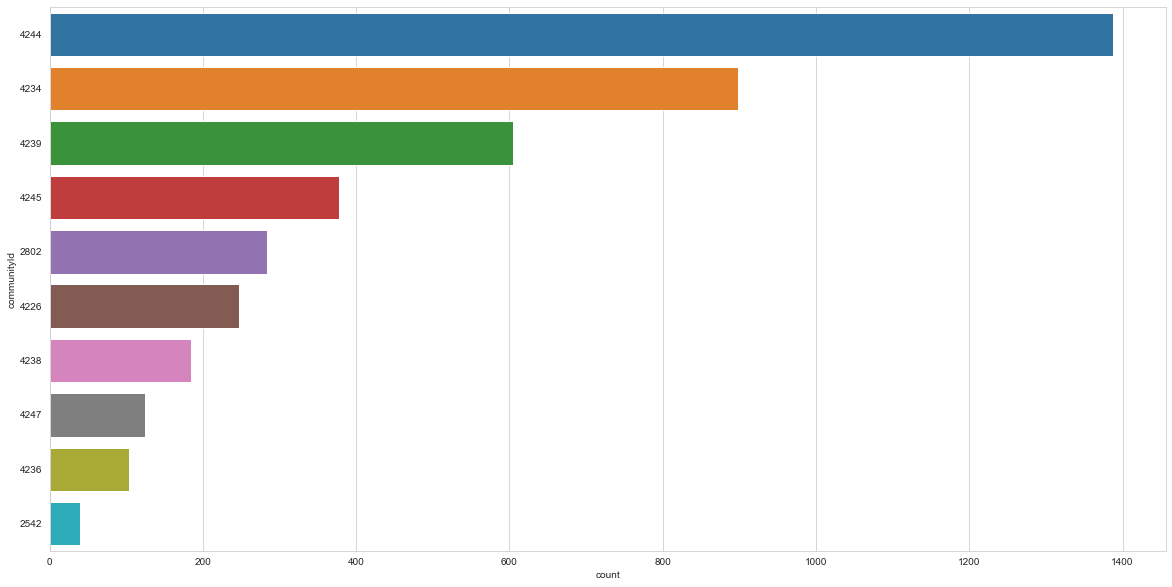

In [50]:
sns.set_style('whitegrid')

fig, (ax0) = plt.subplots(1, figsize = (20, 10))

g0 = sns.barplot(y = 'communityId', x = 'count', ax = ax0,
                 data = communities_count[communities_count['count'] > 1].sort_values('count', ascending = False)
                 )

#plt.ylim(0,2000)
#plt.xticks(rotation = 45)

In [51]:
communities_4244 = communities_full[communities_full['communityId'] == 4244]
communities_4247 = communities_full[communities_full['communityId'] == 4247]
communities_nVandy = communities_full[communities_full['communityId'] != {4244, 4247}]

In [52]:
communities_4244_count = communities_4244.groupby('Classification')['npi'].count()
communities_4247_count = communities_4247.groupby('Classification')['npi'].count()
communities_nVandy_count = communities_nVandy.groupby('Classification')['npi'].count()

In [53]:
#communities_1410_count = communities_1410_count.reset_index()

In [55]:
communities_4244_count.sort_values(ascending = False)

Classification
Internal Medicine                                     324
Nurse Practitioner                                    260
Anesthesiology                                         96
Nurse Anesthetist, Certified Registered                87
Radiology                                              83
Psychiatry & Neurology                                 78
Emergency Medicine                                     57
Surgery                                                42
Pathology                                              40
Ophthalmology                                          34
Otolaryngology                                         28
Dermatology                                            28
Family Medicine                                        27
Hospitalist                                            25
Orthopaedic Surgery                                    20
Physician Assistant                                    17
Obstetrics & Gynecology                                15

In [56]:
communities_4247_count.sort_values(ascending = False).head(20)

Classification
Nurse Practitioner                         20
Family Medicine                            16
Internal Medicine                          16
Nurse Anesthetist, Certified Registered    15
Physician Assistant                         7
Orthopaedic Surgery                         7
Psychiatry & Neurology                      6
Anesthesiology                              4
Emergency Medicine                          4
Specialist                                  3
Physical Medicine & Rehabilitation          3
General Acute Care Hospital                 3
Surgery                                     3
Obstetrics & Gynecology                     2
General Practice                            2
Pediatrics                                  2
Podiatrist                                  2
Radiology                                   2
Chiropractor                                1
Clinical Nurse Specialist                   1
Name: npi, dtype: int64

In [183]:
communities_nVandy_count.sort_values(ascending = False)

Classification
Internal Medicine                                                   1257
Nurse Practitioner                                                  1137
Nurse Anesthetist, Certified Registered                              510
Family Medicine                                                      388
Radiology                                                            297
Anesthesiology                                                       272
Physician Assistant                                                  262
Emergency Medicine                                                   236
Psychiatry & Neurology                                               236
Chiropractor                                                         193
Physical Therapist                                                   193
Optometrist                                                          181
Clinic/Center                                                        177
Surgery                             

Outer merge, how = outter

classification (ie nurse practitioner)
vandy count
nVandy count
total count
perc

one step further
look at the ones they don't have a monopoly or major market share in